In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
loan = pd.read_csv('loan_data_set.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### How many application from urban, rural and semi-urban having loan-status yes.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

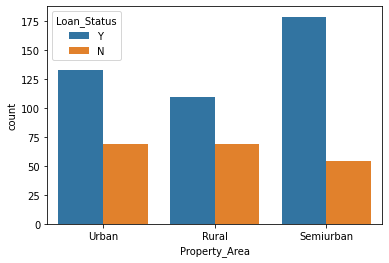

In [3]:
sns.countplot(data = loan,x = 'Property_Area',hue = 'Loan_Status')

### Loan ID who demands highest and minimum loan amount.

In [3]:
loan[loan['LoanAmount']==loan['LoanAmount'].min()]['Loan_ID']

568    LP002840
Name: Loan_ID, dtype: object

In [4]:
loan[loan['LoanAmount']==loan['LoanAmount'].max()]['Loan_ID']

171    LP001585
Name: Loan_ID, dtype: object

### How many self employed from urban area having loan status no.

In [5]:
loan[(loan['Self_Employed']=='Yes') & (loan['Property_Area'] == 'Urban') & (loan['Loan_Status']=='N')]["Loan_Status"].count()

10

Text(0, 0.5, 'Self_Employed')

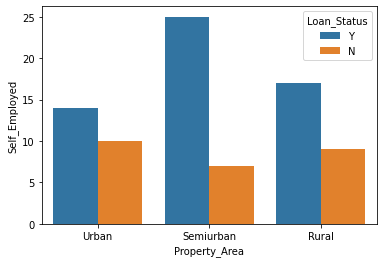

In [7]:
result = loan[loan['Self_Employed']=='Yes']
sns.countplot(data = result,x = 'Property_Area',hue = 'Loan_Status')
plt.ylabel('Self_Employed')

### How many unmarried applied for loan.

In [8]:
loan[(loan['Married']=='No') & (loan['Loan_Status']=='Y')]['Loan_Status'].count()

134

<AxesSubplot:xlabel='Married', ylabel='count'>

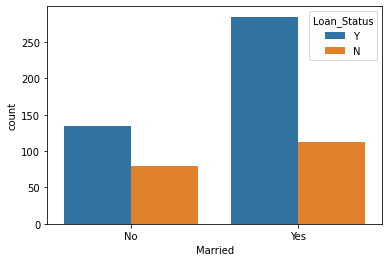

In [9]:
sns.countplot(data=loan,x='Married',hue='Loan_Status')

### How many female employees from rural areas having loan status yes.

In [10]:
loan[(loan['Gender']=='Female') & (loan['Property_Area']== 'Rural') & (loan['Loan_Status']=='Y')]['Loan_Status'].count()

14

In [11]:
temp = loan[loan['Gender']=='Female']
temp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
37,LP001112,Female,Yes,0,Graduate,No,3667,1459.0,144.0,360.0,1.0,Semiurban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
48,LP001146,Female,Yes,0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban,N


Text(0, 0.5, 'Females')

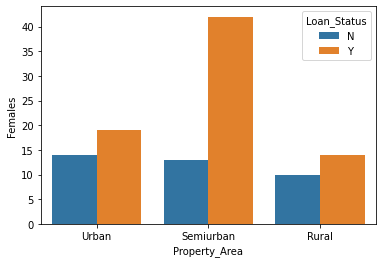

In [12]:
sns.countplot(data = temp,x = 'Property_Area',hue = 'Loan_Status')
plt.ylabel('Females')

### Number of male applicants having salary less 10,000 having loan status yes.

In [13]:
loan[(loan['Gender']=='Male')&(loan['ApplicantIncome']+loan['CoapplicantIncome']<10000)&(loan['Loan_Status']=='Y')]['Loan_Status'].count()

295

In [14]:
temp1 = loan[loan["ApplicantIncome"]+loan["CoapplicantIncome"]<10000]
temp1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Text(0, 0.5, 'Income<10000')

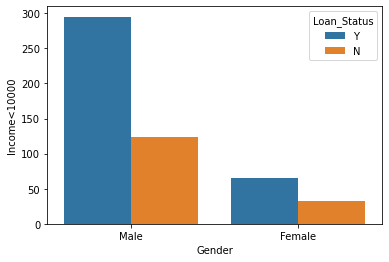

In [15]:
sns.countplot(data = temp1,x = "Gender",hue = 'Loan_Status')
plt.ylabel("Income<10000")